# Heart Failure Analysis

This project will look into a dataset containing information about patients who had heart failure. 

First we will look into how each of the attributes from the dataset impacts patient's mortality rate. We will do this by dividing the dataset into groups of deceased and alive patients and then see how expressed each attribute is between these 2 groups.

Dataset can be found on this link: https://archive.ics.uci.edu/ml/datasets/Heart+failure+clinical+records. The dataset contains 13 attributes: - age: age of the patient (years)- anaemia: decrease of red blood cells or hemoglobin (boolean)- high blood pressure: if the patient has hypertension (boolean)- creatinine phosphokinase (CPK): level of the CPK enzyme in the blood (mcg/L)- diabetes: if the patient has diabetes (boolean)- ejection fraction: percentage of blood leaving the heart at each contraction (percentage)- platelets: platelets in the blood (kiloplatelets/mL)- sex: woman or man (binary)- serum creatinine: level of serum creatinine in the blood (mg/dL)- serum sodium: level of serum sodium in the blood (mEq/L)- smoking: if the patient smokes or not (boolean)- time: follow-up period (days)- [target] death event: if the patient deceased during the follow-up period (boolean).

### Importing modules

In [1]:
import pandas as pd
import numpy as np

In [2]:
!pip install mpld3==0.5.5

     |████████████████████████████████| 1.0 MB 5.8 MB/s 
  Created wheel for mpld3: filename=mpld3-0.5.5-py3-none-any.whl size=200907 sha256=695212447e9cc93e383b8ed570429650ad20626df6d1cac6d595b900dfb4847c
  Stored in directory: /root/.cache/pip/wheels/3b/f3/08/a11447ac4ea31d7603142e76b4cba9e48b2fa7d82b76b69731
Successfully built mpld3
You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.


In [3]:
import matplotlib.pyplot as plt 
import matplotlib.gridspec as gridspec 
import mpld3 as mpl

### Loading the data

In [4]:
df = pd.read_csv("/work/heart_failure_clinical_records_dataset.csv")
df.head(10)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
5,90.0,1,47,0,40,1,204000.00,2.1,132,1,1,8,1
6,75.0,1,246,0,15,0,127000.00,1.2,137,1,0,10,1
7,60.0,1,315,1,60,0,454000.00,1.1,131,1,1,10,1
8,65.0,0,157,0,65,0,263358.03,1.5,138,0,0,10,1
9,80.0,1,123,0,35,1,388000.00,9.4,133,1,1,10,1


### Analyzing the data

Showing the %'s of all deceased and alive patients.

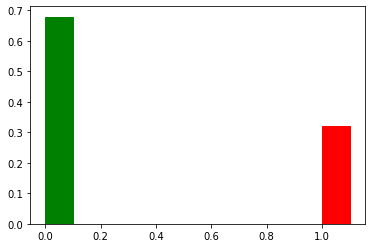

In [5]:
y = df.groupby('DEATH_EVENT').count()['age'] # Number of alive, dead
Y = [number / (y[0] + y[1]) for number in y] # % od alive, dead
barlist = plt.bar([0, 1], Y, width=0.1, align='edge') 

barlist[0].set_color('g')
barlist[1].set_color('r')

plt.show()

Analyzing the relationship between the attributes and the outcome of heart problem.

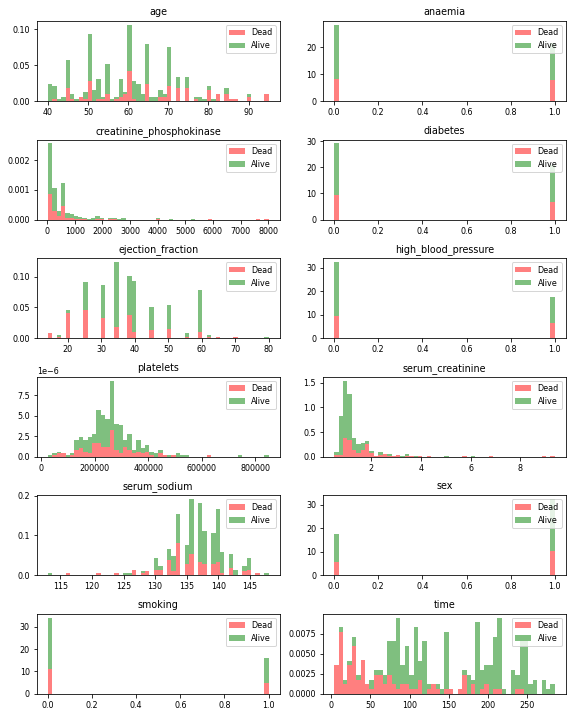

In [6]:
dfD=df[df['DEATH_EVENT'] ==1]
dfA=df[df['DEATH_EVENT'] ==0]


featuresNameList = list(df.columns[0:12])
numberOfColumns = 2 # number of columns in a subplot matrix
numberOfRows = len(featuresNameList)//numberOfColumns

plt.rcParams.update({'font.size': 8})
fig, axes = plt.subplots(nrows=numberOfRows, ncols=numberOfColumns, figsize=(8,10))
axes = axes.ravel()
for idx,ax in enumerate(axes):
    ax.figure
    binwidth= (max(df[featuresNameList[idx]]) - min(df[featuresNameList[idx]]))/50
    ax.hist([dfD[featuresNameList[idx]],dfA[featuresNameList[idx]]], bins=np.arange(min(df[featuresNameList[idx]]), max(df[featuresNameList[idx]]) + binwidth, binwidth) , alpha=0.5, stacked=True, density=True, label=['Dead','Alive'],color=['r','g'])
    ax.legend(loc='upper right')
    ax.set_title(featuresNameList[idx])
plt.tight_layout()
plt.show()

### Observations:

These arguments do not seem to make any extreme difference between patients who die and patience who survive. A deeper analysis is needed to provide more insight into these parameters.

## Individual analysis

In [7]:
numberOfDead = dfD.count()['age']
numberOfAlive = dfA.count()['age']


### Age:

In [8]:
ageDeadMean = dfD['age'].mean()
ageAliveMean = dfA['age'].mean()

print("On average people who do not survive heart failure are ", ageDeadMean, " years old")
print("On average people who survive heart failure are ", ageAliveMean, " years old")


On average people who do not survive heart failure are  65.21528124999999  years old
On average people who survive heart failure are  58.761906403940884  years old


There is a difference in age, though it is slight.

### Anaemia:

In [9]:
numberOfDeadWithAnaemia = dfD[dfD['anaemia'] == 1].count()['age'] 
numberOfAliveWithAnaemia = dfA[dfA['anaemia'] == 1].count()['age'] 

print(numberOfDeadWithAnaemia/numberOfDead * 100, "% of people who died from heart failure had anaemia")
print((numberOfDead-numberOfDeadWithAnaemia)/numberOfDead * 100, "% of people who died from heart failure did not have anaemia")
print(numberOfAliveWithAnaemia/numberOfAlive * 100, "% of people who did not die from heart failure had anaemia")
print((numberOfAlive-numberOfAliveWithAnaemia)/numberOfAlive * 100, "% of people who did not die from heart failure did not have anaemia")

47.91666666666667 % of people who died from heart failure had anaemia
52.083333333333336 % of people who died from heart failure did not have anaemia
40.88669950738916 % of people who did not die from heart failure had anaemia
59.11330049261084 % of people who did not die from heart failure did not have anaemia


Anaemia does not seem to make a huge difference as well.

### Creatinine phosphokinase

In [10]:
CPDeadMean = dfD['creatinine_phosphokinase'].mean()
CPAliveMean = dfA['creatinine_phosphokinase'].mean()

print("On average people who do not survive heart failure have ", CPDeadMean, " creatinine phosphokinase")
print("On average people who survive heart failure have ", CPAliveMean, " creatinine phosphokinase")

On average people who do not survive heart failure have  670.1979166666666  creatinine phosphokinase
On average people who survive heart failure have  540.0541871921182  creatinine phosphokinase


Creatinine phosphokinase levels do make an impact on HF survival rate.

### Diabetes

In [11]:
numberOfDeadWithDiabetes = dfD[dfD['diabetes'] == 1].count()['age'] 
numberOfAliveWithDiabetes = dfA[dfA['diabetes'] == 1].count()['age'] 

print(numberOfDeadWithDiabetes/numberOfDead * 100, "% of people who died from heart failure had diabetes")
print((numberOfDead-numberOfDeadWithDiabetes)/numberOfDead * 100, "% of people who died from heart failure did not have diabetes")
print(numberOfAliveWithDiabetes/numberOfAlive * 100, "% of people who did not die from heart failure had diabetes")
print((numberOfAlive-numberOfAliveWithDiabetes)/numberOfAlive * 100, "% of people who did not die from heart failure did not have diabetes")

41.66666666666667 % of people who died from heart failure had diabetes
58.333333333333336 % of people who died from heart failure did not have diabetes
41.87192118226601 % of people who did not die from heart failure had diabetes
58.128078817733986 % of people who did not die from heart failure did not have diabetes


Percentage of diabetes is about equal in both groups of people. 

### Ejection fraction

In [12]:
EFDeadMean = dfD['ejection_fraction'].mean()
EFAliveMean = dfA['ejection_fraction'].mean()

print("On average people who do not survive heart failure eject a fraction of ", CPDeadMean)
print("On average people who survive heart failure eject a fraction of ", CPAliveMean)


On average people who do not survive heart failure eject a fraction of  670.1979166666666
On average people who survive heart failure eject a fraction of  540.0541871921182


Ejection fraction shows distinct values in two groups, making it an excellent parameter for mortality prediction.

### High blood pressure

In [13]:
numberOfDeadWithHBP = dfD[dfD['high_blood_pressure'] == 1].count()['age'] 
numberOfAliveWithHBP = dfA[dfA['high_blood_pressure'] == 1].count()['age'] 

print(numberOfDeadWithHBP/numberOfDead * 100, "% of people who died from heart failure had HBP")
print((numberOfDead-numberOfDeadWithHBP)/numberOfDead * 100, "% of people who died from heart failure did not have HBP")
print(numberOfAliveWithHBP/numberOfAlive * 100, "% of people who did not die from heart failure had HBP")
print((numberOfAlive-numberOfAliveWithHBP)/numberOfAlive * 100, "% of people who did not die from heart failure did not have HBP")


40.625 % of people who died from heart failure had HBP
59.375 % of people who died from heart failure did not have HBP
32.51231527093596 % of people who did not die from heart failure had HBP
67.48768472906403 % of people who did not die from heart failure did not have HBP


There is a slight difference in high blood pressure between two groups, but it is not extremely obvious.

### Platelets in blood

In [14]:
PDeadMean = dfD['platelets'].mean()
PAliveMean = dfA['platelets'].mean()

print("On average people who do not survive heart failure had platelets level of ", PDeadMean)
print("On average people who survive heart failure had platelets level of ", PAliveMean)

On average people who do not survive heart failure had platelets level of  256381.04479166667
On average people who survive heart failure had platelets level of  266657.4899014778


Platelets do not make a huge difference between 2 groups.

### Serum creatinine

In [15]:
SCDeadMean = dfD['serum_creatinine'].mean()
SCAliveMean = dfA['serum_creatinine'].mean()

print("On average people who do not survive heart failure had Serum creatinine level of ", SCDeadMean)
print("On average people who survive heart failure had Serum creatinine level of ", SCAliveMean)

On average people who do not survive heart failure had Serum creatinine level of  1.8358333333333334
On average people who survive heart failure had Serum creatinine level of  1.1848768472906404


Levels of serum creatinine in blood make an extreme distinction between people who do and do not survive HF.

### Serum sodium

In [16]:
SSDeadMean = dfD['serum_sodium'].mean()
SSAliveMean = dfA['serum_sodium'].mean()

print("On average people who do not survive heart failure had Serum sodium level of ", SSDeadMean)
print("On average people who survive heart failure had Serum sodium level of ", SSAliveMean)

On average people who do not survive heart failure had Serum sodium level of  135.375
On average people who survive heart failure had Serum sodium level of  137.2167487684729


Serum sodium levels in blood do not make a huge difference between 2 groups.

### Gender

In [17]:
numberOfDeadMale = dfD[dfD['sex'] == 1].count()['age'] 
numberOfAliveMale = dfA[dfA['sex'] == 1].count()['age'] 

print(numberOfDeadMale/numberOfDead * 100, "% of people who died from heart failure are male")
print((numberOfDead-numberOfDeadMale)/numberOfDead * 100, "% of people who died from heart failure are female")
print(numberOfAliveMale/numberOfAlive * 100, "% of people who did not die from heart failure are male")
print((numberOfAlive-numberOfAliveMale)/numberOfAlive * 100, "% of people who did not die from heart failure are female")

64.58333333333334 % of people who died from heart failure are male
35.41666666666667 % of people who died from heart failure are female
65.02463054187191 % of people who did not die from heart failure are male
34.97536945812808 % of people who did not die from heart failure are female


Men tend to have HFs more often but gender does not affect mortality rate.

### Smoking

In [18]:
numberOfDeadSmokers = dfD[dfD['smoking'] == 1].count()['age'] 
numberOfAliveSmokers = dfA[dfA['smoking'] == 1].count()['age'] 

print(numberOfDeadSmokers/numberOfDead * 100, "% of people who died from heart failure are smoking")
print((numberOfDead-numberOfDeadSmokers)/numberOfDead * 100, "% of people who died from heart failure are not smoking")
print(numberOfAliveSmokers/numberOfAlive * 100, "% of people who did not die from heart failure are male")
print((numberOfAlive-numberOfAliveSmokers)/numberOfAlive * 100, "% of people who did not die from heart failure are not smoking")

31.25 % of people who died from heart failure are smoking
68.75 % of people who died from heart failure are not smoking
32.51231527093596 % of people who did not die from heart failure are male
67.48768472906403 % of people who did not die from heart failure are not smoking


Smoking %s are about the same among both groups.

### Time

In [19]:
TimeDeadMean = dfD['time'].mean()
TimeAliveMean = dfA['time'].mean()

print("On average people who do not survive heart failure die after ", TimeDeadMean, " days")
print("On average people who survive heart failure are alive even after ", TimeAliveMean, " days")

On average people who do not survive heart failure die after  70.88541666666667  days
On average people who survive heart failure are alive even after  158.3399014778325  days


This attribute can be interpreted in a controversial way if it is fed to algorithms in a straightforward way because it suggest that with longer period of time under monitoring people tend to live longer. This result really means that people that die after a HF do so in a short amount of time, and people who survive it live for more than half a year after it.

# Trying to predict mortality based on patients attributes

In this part we will try to predict whether patient will survive HF based on patient's condition. For this task we will use a broad range of classifying algorithms from sklearn library.

Since there is noticeably more data for patients who survived HF than for those who did not, F1 score will be more appreciated than pure precision of used algorithms. 

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn import metrics

from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit

In [21]:
def classification_model(model, data, predictors, outcome):
    #Fit the model:
    model.fit(data[predictors],data[outcome])

    #Make predictions on training set:
    predictions = model.predict(data[predictors])

    #Print accuracy
    accuracy = metrics.accuracy_score(predictions,data[outcome])
    f1 = metrics.f1_score(predictions, data[outcome])
    print("Accuracy : %s" % "{0:.3%}".format(accuracy))
    print("F1 : %s" % "{0:.3%}".format(f1)) 
    #Perform k-fold cross-validation with 5 folds
    kf = KFold(5)
    error = []
    for train, test in kf.split(data):
        # Filter training data
        train_predictors = (data[predictors].iloc[train,:])

        # The target we're using to train the algorithm.
        train_target = data[outcome].iloc[train]

        # Training the algorithm using the predictors and target.
        model.fit(train_predictors, train_target)

        #Record error from each cross-validation run
        current_error = model.score(data[predictors].iloc[test,:], data[outcome].iloc[test])
        error.append(current_error)

        print("Cross-Validation Score : %s" % "{0:.3%}".format(current_error))
    
    #Fit the model again so that it can be refered outside the function
    print("Cross-Validation MEAN Score : %s" % "{0:.3%}".format(np.mean(error)))
    model.fit(data[predictors],data[outcome])

In [22]:
def plot_learning_curve(estimator, title, X, y, axes=None, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate 3 plots: the test and training learning curve, the training
    samples vs fit times curve, the fit times vs score curve.

    Parameters
    ----------
    estimator : estimator instance
        An estimator instance implementing `fit` and `predict` methods which
        will be cloned for each validation.

    title : str
        Title for the chart.

    X : array-like of shape (n_samples, n_features)
        Training vector, where ``n_samples`` is the number of samples and
        ``n_features`` is the number of features.

    y : array-like of shape (n_samples) or (n_samples, n_features)
        Target relative to ``X`` for classification or regression;
        None for unsupervised learning.

    axes : array-like of shape (3,), default=None
        Axes to use for plotting the curves.

    ylim : tuple of shape (2,), default=None
        Defines minimum and maximum y-values plotted, e.g. (ymin, ymax).

    cv : int, cross-validation generator or an iterable, default=None
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:

          - None, to use the default 5-fold cross-validation,
          - integer, to specify the number of folds.
          - :term:`CV splitter`,
          - An iterable yielding (train, test) splits as arrays of indices.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : int or None, default=None
        Number of jobs to run in parallel.
        ``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.
        ``-1`` means using all processors. See :term:`Glossary <n_jobs>`
        for more details.

    train_sizes : array-like of shape (n_ticks,)
        Relative or absolute numbers of training examples that will be used to
        generate the learning curve. If the ``dtype`` is float, it is regarded
        as a fraction of the maximum size of the training set (that is
        determined by the selected validation method), i.e. it has to be within
        (0, 1]. Otherwise it is interpreted as absolute sizes of the training
        sets. Note that for classification the number of samples usually have
        to be big enough to contain at least one sample from each class.
        (default: np.linspace(0.1, 1.0, 5))
    """
    if axes is None:
        _, axes = plt.subplots(1, 3, figsize=(20, 5))

    axes[0].set_title(title)
    if ylim is not None:
        axes[0].set_ylim(*ylim)
    axes[0].set_xlabel("Training examples")
    axes[0].set_ylabel("Score")

    train_sizes, train_scores, test_scores, fit_times, _ = \
        learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs,
                       train_sizes=train_sizes,
                       return_times=True)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    fit_times_mean = np.mean(fit_times, axis=1)
    fit_times_std = np.std(fit_times, axis=1)

    # Plot learning curve
    axes[0].grid()
    axes[0].fill_between(train_sizes, train_scores_mean - train_scores_std,
                         train_scores_mean + train_scores_std, alpha=0.1,
                         color="r")
    axes[0].fill_between(train_sizes, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1,
                         color="g")
    axes[0].plot(train_sizes, train_scores_mean, 'o-', color="r",
                 label="Training score")
    axes[0].plot(train_sizes, test_scores_mean, 'o-', color="g",
                 label="Cross-validation score")
    axes[0].legend(loc="best")

    # Plot n_samples vs fit_times
    axes[1].grid()
    axes[1].plot(train_sizes, test_scores_mean, 'o-', color="g",
                 label="Cross-validation score")
    axes[1].fill_between(train_sizes, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1,
                         color="g")
    axes[1].set_xlabel("Training examples")
    axes[1].set_ylabel("CV Score")
    axes[1].set_title("Scalability of the model")

    # Plot fit_time vs score
    axes[2].grid()
    axes[2].plot(fit_times_mean, test_scores_mean, 'o-')
    axes[2].fill_between(fit_times_mean, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1)
    axes[2].set_xlabel("fit_times")
    axes[2].set_ylabel("Score")
    axes[2].set_title("Performance of the model")

    return plt

In [23]:
traindf, testdf = train_test_split(df, test_size = 0.3)

### RidgeClassifier

First we will try to predict mortality with sklearn's RidgeClassifier. Although algorithms using regression to do classification tasks are almost prohibited in theory, for practical reasons we will try to see if it really makes a huge difference.

In [24]:
from sklearn.linear_model import RidgeClassifier

In [25]:
predictor_var = ['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes', 'ejection_fraction', 'high_blood_pressure', 'platelets', 'serum_creatinine',	'serum_sodium', 'sex', 'smoking', 'time']	
outcome_var='DEATH_EVENT'
modelRidge=RidgeClassifier()
classification_model(modelRidge,traindf,predictor_var,outcome_var)

Accuracy : 85.167%
F1 : 74.797%
Cross-Validation Score : 73.810%
Cross-Validation Score : 83.333%
Cross-Validation Score : 85.714%
Cross-Validation Score : 78.571%
Cross-Validation Score : 82.927%
Cross-Validation MEAN Score : 80.871%


<module 'matplotlib.pyplot' from '/shared-libs/python3.7/py/lib/python3.7/site-packages/matplotlib/pyplot.py'>

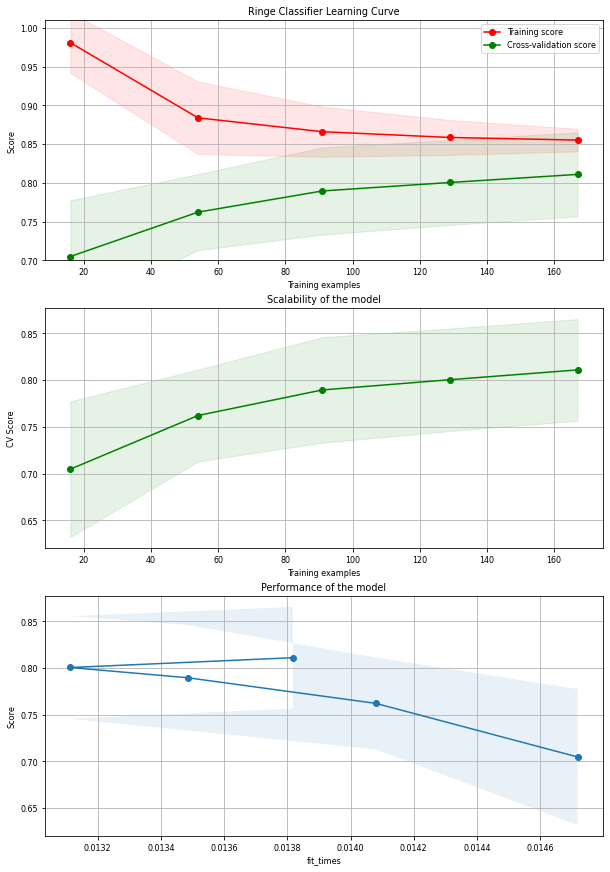

In [26]:
fig, axes = plt.subplots(3, 1, figsize=(10, 15))
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)


plot_learning_curve(modelRidge, "Ringe Classifier Learning Curve", traindf[predictor_var], traindf[outcome_var], axes=axes, ylim=(0.7, 1.01),
                    cv=cv, n_jobs=4)

Expectedly, RidgeClassifier did not fit the data too well. Moreover, graphic shows that both training and CV error are too high. All of the above is the sign of the model having high bias problem.

### Logistic Regression

In [27]:
from sklearn.linear_model import LogisticRegression

In [28]:
predictor_var = ['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes', 'ejection_fraction', 'high_blood_pressure', 'platelets', 'serum_creatinine',	'serum_sodium', 'sex', 'smoking', 'time']	
outcome_var='DEATH_EVENT'
modelLogReg=LogisticRegression(max_iter=10000)
classification_model(modelLogReg,traindf,predictor_var,outcome_var)

Accuracy : 82.297%
F1 : 69.421%
Cross-Validation Score : 80.952%
Cross-Validation Score : 85.714%
Cross-Validation Score : 80.952%
Cross-Validation Score : 76.190%
Cross-Validation Score : 82.927%
Cross-Validation MEAN Score : 81.347%


Logistic regression gives roughly the same results as Ridge Classification. We could try to improve the algorithm by giving it a subset of its features.

In [29]:
predictor_var = ['age', 'serum_sodium', 'time', 'ejection_fraction', 'serum_creatinine']	
outcome_var='DEATH_EVENT'
modelLogReg2=LogisticRegression(max_iter=10000)
classification_model(modelLogReg2,traindf,predictor_var,outcome_var)

Accuracy : 84.689%
F1 : 74.603%
Cross-Validation Score : 76.190%
Cross-Validation Score : 88.095%
Cross-Validation Score : 88.095%
Cross-Validation Score : 73.810%
Cross-Validation Score : 85.366%
Cross-Validation MEAN Score : 82.311%


### Decision Trees

In [30]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz

In [31]:
predictor_var = ['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes', 'ejection_fraction', 'high_blood_pressure', 'platelets', 'serum_creatinine',	'serum_sodium', 'sex', 'smoking', 'time']	
outcome_var='DEATH_EVENT'
modelDecTree=DecisionTreeClassifier()
classification_model(modelDecTree,traindf,predictor_var,outcome_var)

Accuracy : 100.000%
F1 : 100.000%
Cross-Validation Score : 76.190%
Cross-Validation Score : 69.048%
Cross-Validation Score : 80.952%
Cross-Validation Score : 76.190%
Cross-Validation Score : 82.927%
Cross-Validation MEAN Score : 77.062%


As can be seen, decision trees get excellent accuracy and F1 score on training set but are performing bad when it comes to CV set. This is a sign of high variance.

In [32]:
predictor_var = ['age', 'serum_sodium', 'time', 'ejection_fraction', 'serum_creatinine']
outcome_var='DEATH_EVENT'
modelDecTree2=DecisionTreeClassifier()
classification_model(modelDecTree2,traindf,predictor_var,outcome_var)

Accuracy : 100.000%
F1 : 100.000%
Cross-Validation Score : 80.952%
Cross-Validation Score : 76.190%
Cross-Validation Score : 71.429%
Cross-Validation Score : 78.571%
Cross-Validation Score : 78.049%
Cross-Validation MEAN Score : 77.038%


With a limited set of features generalization is a bit better and error on CV set is smaller.

<module 'matplotlib.pyplot' from '/shared-libs/python3.7/py/lib/python3.7/site-packages/matplotlib/pyplot.py'>

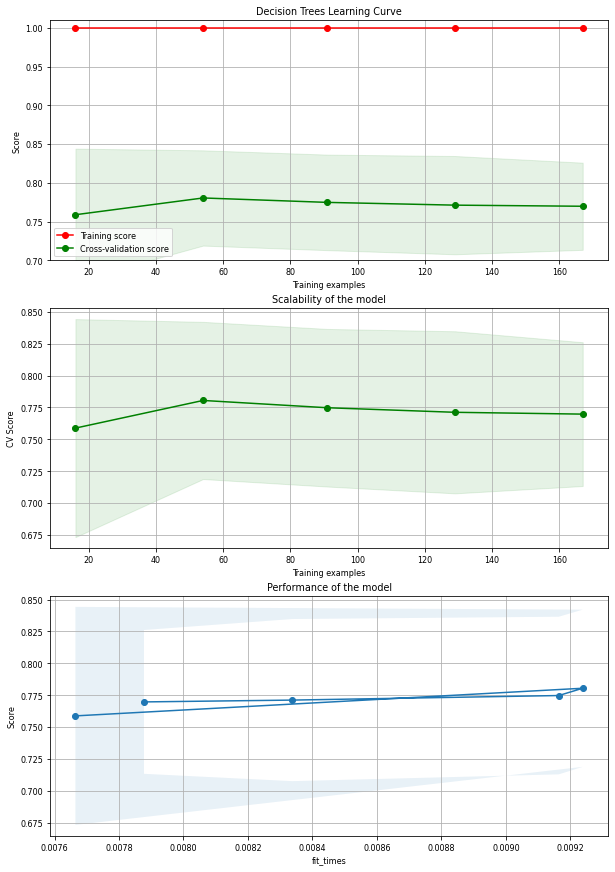

In [33]:
fig, axes = plt.subplots(3, 1, figsize=(10, 15))
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)


plot_learning_curve(modelDecTree2, "Decision Trees Learning Curve", traindf[predictor_var], traindf[outcome_var], axes=axes, ylim=(0.7, 1.01),
                    cv=cv, n_jobs=4)

Gap between train and test error is huge, signaling a high variance problem. We could try to tune down the variance using random forests.

### Neural Networks

In [77]:
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_norm = scaler.fit_transform(traindf)
X_test_norm = scaler.fit_transform(testdf)
dfTrainNorm = pd.DataFrame(X_train_norm, columns=df.columns)

In [78]:
predictor_var = ['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes', 'ejection_fraction', 'high_blood_pressure', 'platelets', 'serum_creatinine',	'serum_sodium', 'sex', 'smoking', 'time']	
predictor_var = bestFeatures
outcome_var='DEATH_EVENT'
modelNN=MLPClassifier(hidden_layer_sizes=(10, 10, 10, 10, 10), max_iter=5000)
classification_model(modelNN,dfTrainNorm,predictor_var,outcome_var)

Accuracy : 86.603%
F1 : 77.419%
Cross-Validation Score : 88.095%
Cross-Validation Score : 90.476%
Cross-Validation Score : 85.714%
Cross-Validation Score : 78.571%
Cross-Validation Score : 80.488%
Cross-Validation MEAN Score : 84.669%


### Random Forests

In [34]:
from sklearn.ensemble import RandomForestClassifier

In [35]:
predictor_var = ['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes', 'ejection_fraction', 'high_blood_pressure', 'platelets', 'serum_creatinine',	'serum_sodium', 'sex', 'smoking', 'time']	
outcome_var='DEATH_EVENT'
modelRandFor=RandomForestClassifier()
classification_model(modelRandFor,traindf,predictor_var,outcome_var)

Accuracy : 100.000%
F1 : 100.000%
Cross-Validation Score : 85.714%
Cross-Validation Score : 85.714%
Cross-Validation Score : 85.714%
Cross-Validation Score : 83.333%
Cross-Validation Score : 80.488%
Cross-Validation MEAN Score : 84.193%


Random Forests keep the high accuracy and F1 score just like decision trees, but CV score improved, signaling that we successfully lowered the variance.

To further lower down the variance we can use a smaller set of features. Random Forests give us the importance of each feature so we can use only the most important ones.

In [36]:
featimp = pd.Series(modelRandFor.feature_importances_, index=predictor_var).sort_values(ascending=False)
print(featimp)


time                        0.374352
serum_creatinine            0.133575
ejection_fraction           0.119574
creatinine_phosphokinase    0.089852
platelets                   0.078712
age                         0.076146
serum_sodium                0.070857
sex                         0.012413
high_blood_pressure         0.012252
anaemia                     0.011836
smoking                     0.011406
diabetes                    0.009025
dtype: float64


In [37]:
bestFeatures = featimp.index[:5]
print(bestFeatures)

Index(['time', 'serum_creatinine', 'ejection_fraction',
       'creatinine_phosphokinase', 'platelets'],
      dtype='object')


In [38]:
bestFeatures = featimp.index[:5]
print(bestFeatures)
outcome_var='DEATH_EVENT'
modelRandFor2=RandomForestClassifier(n_estimators=150,min_samples_split=5, max_depth=5, max_features=3)
classification_model(modelRandFor2,traindf,bestFeatures,outcome_var)

Index(['time', 'serum_creatinine', 'ejection_fraction',
       'creatinine_phosphokinase', 'platelets'],
      dtype='object')
Accuracy : 94.258%
F1 : 90.769%
Cross-Validation Score : 90.476%
Cross-Validation Score : 76.190%
Cross-Validation Score : 88.095%
Cross-Validation Score : 78.571%
Cross-Validation Score : 78.049%
Cross-Validation MEAN Score : 82.276%


Trying Random forests with 5 best features on test set:

In [39]:

classification_model(modelRandFor2,testdf,bestFeatures,outcome_var)

Accuracy : 97.778%
F1 : 96.667%
Cross-Validation Score : 83.333%
Cross-Validation Score : 94.444%
Cross-Validation Score : 77.778%
Cross-Validation Score : 88.889%
Cross-Validation Score : 72.222%
Cross-Validation MEAN Score : 83.333%


<module 'matplotlib.pyplot' from '/shared-libs/python3.7/py/lib/python3.7/site-packages/matplotlib/pyplot.py'>

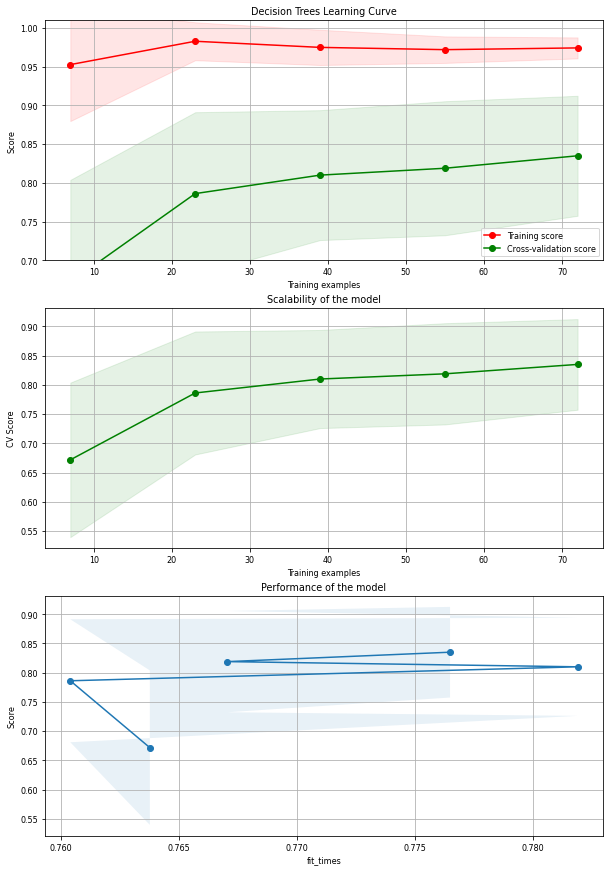

In [81]:
fig, axes = plt.subplots(3, 1, figsize=(10, 15))
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)


plot_learning_curve(modelRandFor2, "Decision Trees Learning Curve", testdf[predictor_var], testdf[outcome_var], axes=axes, ylim=(0.7, 1.01),
                    cv=cv, n_jobs=4)

Accuracy and F1 score show pretty good results, cross-validation mean score is low but in test set CV sets get a very small part of data to measure.

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=7805022e-0551-4ab1-9c1b-7f865b17ad52' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>